# Reddit toxic comment classifier
## Model evaluation and selection

### John Burt


### Introduction:

Here, I compare the performance of four classifier models across comment datasets from the 12 subreddits. The model performance data used for this analysis was logged during validation runs. For a metric, I chose balanced accuracy. Since this was a binary classification problem, a score of 50% was equivalent to a random prediction, and scores above that are better. 

When evaluating model performance, I was looking at which models had the highest scores, but also how variable the models were: it wouldn't do for a model to perform very well with certain datasets, but very poorly with others.



### Notebook setup and load validation logs

In [11]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-muted')

import pandas as pd
pd.options.display.max_columns = 100

import numpy as np
import datetime

# source data folder 
srcdir = './data_for_models/'

# results logfile path
logpath = srcdir + 'model_results_log.csv'

# read the validation run output logs
df = pd.read_csv(logpath)


In [27]:
df[['sub','balanced_acc']][df['model'].str.contains('xgb', case=False)]

,sub,balanced_acc
97,aww,0.712
98,aww,0.707
99,aww,0.702
100,funny,0.666
101,funny,0.665
102,funny,0.666
103,todayilearned,0.734
104,todayilearned,0.723
105,todayilearned,0.729
106,askreddit,0.560


### How do models perform across subreddits?

Looking at how models performed across all subreddits revealed some interesting trends. None of the models performed well across all subreddit datasets. Also however, each model performed differently with different subreddits. For example, the RNN performed much better than all other models on r/science, but was much poorer than the others on r/politicaldiscussion. The lowest model/sub score was 0.51 (RandomForest/science) and the highest was 0.81 (RandomForest/the_donald).

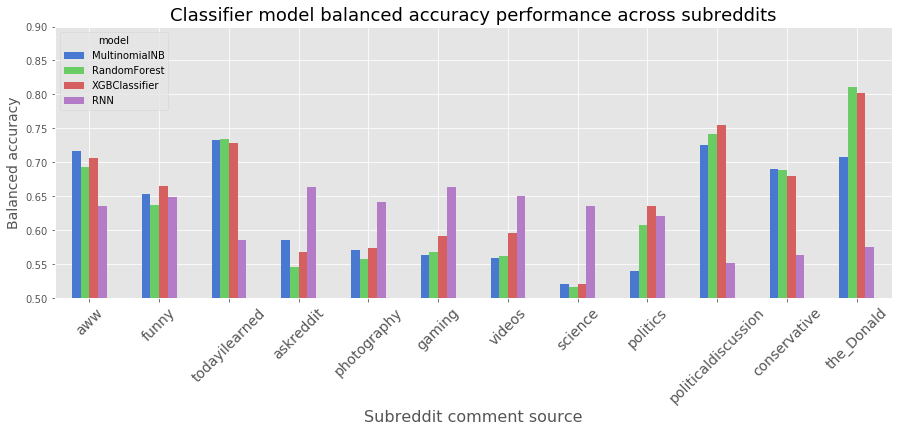

In [13]:
# group logs by model and subreddit
df_gr = df.groupby(['sub','model'], sort=False).mean()
df_gru = df_gr.unstack()

fig, ax = plt.subplots(figsize=(15,5))
df_gru['balanced_acc'].plot.bar(ax=ax)
plt.ylim([.5,.9])
plt.ylabel('Balanced accuracy', fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Subreddit comment source', fontsize=16)
# ax.set_facecolor('white')
plt.title('Classifier model balanced accuracy performance across subreddits', fontsize=18);

### Mean and SEM classifier performance for all subreddits

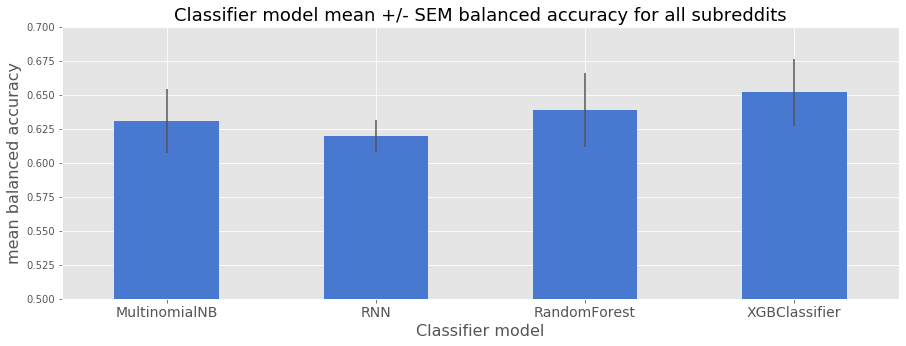

In [14]:
df_pivot = df.pivot_table(index='model', columns ='sub', values='balanced_acc', aggfunc='mean')
df_pivot.mean(axis=1)

fig, ax = plt.subplots(figsize=(15,5))
df_pivot.mean(axis=1).plot.bar(ax=ax, yerr=df_pivot.std(axis=1)/np.sqrt(12))
plt.ylim([.5,.7])
plt.ylabel('mean balanced accuracy', fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.xlabel('Classifier model', fontsize=16)
# ax.set_facecolor('white')
plt.title('Classifier model mean +/- SEM balanced accuracy for all subreddits', fontsize=18);

### Effect of toxic sample size on classifier performance

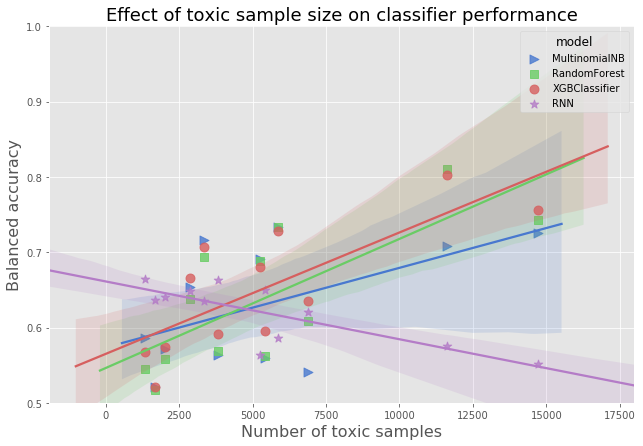

In [71]:
import seaborn as sns

df_grni = df_gr.reset_index()

markers = ['>', 's', 'o', '*']

lm = sns.lmplot( x='num_toxic',y='balanced_acc', data=df_grni, 
            hue='model', legend=True, legend_out=False,
            scatter_kws={"s": 80}, order=1, markers=markers,
            height=6, aspect=1.5)
plt.ylim(.5,1)
plt.title('Effect of toxic sample size on classifier performance', fontsize=18)
plt.xlabel('Number of toxic samples', fontsize=16)
plt.ylabel('Balanced accuracy', fontsize=16);

    

### Effect of total sample size on classifier performance

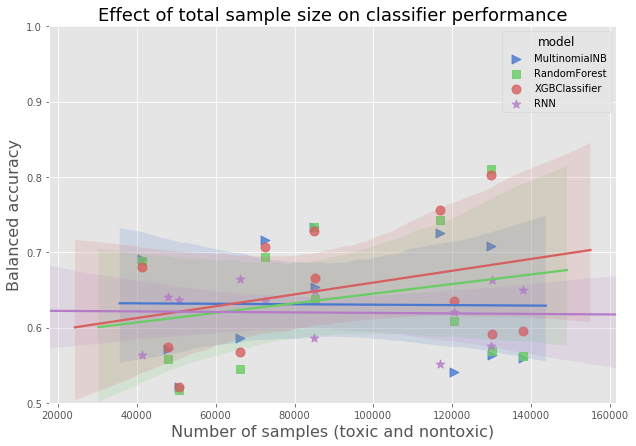

In [81]:
df_grni['num_all'] = df_grni['num_toxic'] + df_grni['num_nontoxic']

markers = ['>', 's', 'o', '*']

lm = sns.lmplot( x='num_all',y='balanced_acc', data=df_grni, 
            hue='model', legend=True, legend_out=False,
            scatter_kws={"s": 80}, order=1, markers=markers,
            height=6, aspect=1.5)
plt.ylim(.5,1)
plt.title('Effect of total sample size on classifier performance', fontsize=18)
plt.xlabel('Number of samples (toxic and nontoxic)', fontsize=16)
plt.ylabel('Balanced accuracy', fontsize=16);


### Effect of toxic sample percentage on classifier performance

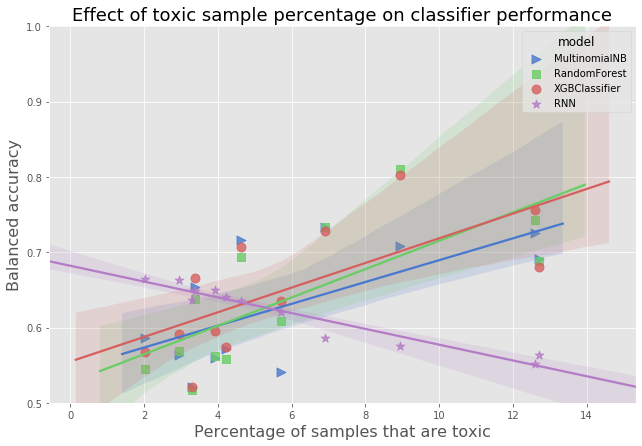

In [80]:
df_grni['cat_pct_toxic'] = 100 * df_grni['num_toxic'] / (df_grni['num_toxic']+df_grni['num_nontoxic']) 

markers = ['>', 's', 'o', '*']

lm = sns.lmplot( x='cat_pct_toxic',y='balanced_acc', data=df_grni, 
            hue='model', legend=True, legend_out=False,
            scatter_kws={"s": 80}, order=1, markers=markers,
            height=6, aspect=1.5)
plt.ylim(.5,1)
plt.title('Effect of toxic sample percentage on classifier performance', fontsize=18)
plt.xlabel('Percentage of samples that are toxic', fontsize=16)
plt.ylabel('Balanced accuracy', fontsize=16);
